In [1]:
import pandas as pd
import pandas_profiling
import pandas.io
import cufflinks as cf
from lifelines import KaplanMeierFitter
import chart_studio.plotly as py
cf.go_offline()
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, utils, tree, pipeline, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.externals import joblib

C:\Users\morga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



This is a relational data set where you can practice your SQL joins as well as data wrangling, analysis, and machine learning. As far as applying machine learning to this data set, you can attempt to cluster employees together into similar groups, you can attempt to predict performance scores or pay rate, or you can attempt to predict whether an employee will be terminated within a certain amount of time. <font color=blue>Additionally, you can also analyze the relationship between pay and performance by position, department, and manager as well as employee demographics</font>.
You should perform the steps below:
* Create a new MySQL database where your data will eventually be stored.
* Create a new Jupyter Notebook for your project.
1. In the Jupyter Notebook, read the data files using Python.
2. Perform any necessary data __wrangling__ and __cleaning__ using Python.
3. Create a connection to your _MySQL_ database using `pymysql` and `sqlalchemy` and write the clean version of the data to the database.

In [3]:
hr = pd.read_csv('HR.csv')

In [ ]:
hr.info()

In [4]:
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [ ]:
pandas_profiling.ProfileReport(hr)

In [ ]:
#The last 91 lines of the dataset seem contain nan values. Let's check it!
hr.tail(91).isna().count()

In [4]:
# I drop all these nan values rows.
hr.dropna(how='all', inplace=True)

In [ ]:
hr.columns

In [ ]:
hr.dtypes

In [5]:
# To respect the anonymity, I delete the Employee_Name & ManagerName features
hr.drop(columns =['Employee_Name','ManagerName'], inplace=True)

In [ ]:
# It seems that the Termd feature is highly correlated to EmpStatusID feature
# First I look at the values in both of them
print("The Termd values are : \n", hr.Termd.values)
print("The EmpStatusID values are : \n", hr.EmpStatusID.values)

In [6]:
# I decide to drop the Termd feature as the EmpStatusID gathers more complete information 
hr.drop(columns = 'Termd', inplace = True)

In [ ]:
# I look at the date columns 
print(hr.DOB.values)
print(hr.DateofHire.values)
print(hr.DateofTermination.values)

In [7]:
# I modify them in the right datetime format type
from datetime import datetime
hr['DOB']= pd.to_datetime(hr['DOB'], format= '%m/%d/%y') 
hr['DateofHire']= pd.to_datetime(hr['DateofHire']) 
hr['DateofTermination']= pd.to_datetime(hr['DateofTermination'], format='%m/%d/%y') 
hr['LastPerformanceReview_Date']= pd.to_datetime(hr['LastPerformanceReview_Date'])

In [ ]:
hr.dtypes

In [ ]:
print(hr.DOB)

In [ ]:
hr.DaysLateLast30.value_counts()

In [8]:
# In the DaysLateLast30 feature, values in 0 are missing, so I decide to delete it
hr.drop(columns = 'DaysLateLast30', inplace = True)

In [ ]:
# I focus on ethnic origin features
print(hr.HispanicLatino.value_counts())
print(hr.RaceDesc.value_counts())

In [9]:
# I decide to delete the HispanicLatino feature as the RaceDesc one gathers all ethnic origins
hr.drop(columns = 'HispanicLatino', inplace = True)

Then, you will start with the clean data set you stored in your database on the previous day. You will explore, analyze, and visualize the data using Python and Tableau, applying the variety of techniques you learned throughout the program.

* In your Jupyter Notebook, read the clean data from your MySQL database.
* Using Pandas, generate summaries of the data and calculate descriptive statistics.
* Practice generating a few basic charts and graphs using `matplotlib` or `seaborn` as well.

In [ ]:
hr.describe()

In [ ]:
sns.heatmap(hr.corr(), cmap = 'RdYlGn',linewidth = .3)

In [ ]:
#your code here
corr = hr.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmax=1, center=0, annot = True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#What is the overall diversity profile of the organization?

In [ ]:
plt.rcParams['figure.figsize'] = (5,4)
sns.countplot(x='Sex', data = hr).set_title('Gender distribution')

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(x='RaceDesc', data = hr).set_title('Ethnic origins distribution')

In [ ]:
hr.RaceDesc.groupby(hr['Sex']).value_counts().plot(kind='barh', color = 'g').set_title('Ethnic origins by gender')

In [ ]:
# I look at the distribution of where employees are sourced
hr.RecruitmentSource.value_counts().plot(kind = 'bar', color = 'orange', figsize=(10, 6)).set_title('The 2 most common sources are: \n Employee referral and Diversity Job Fair')

In [ ]:
#plt.rcParams['figure.figsize'] = (10,5)
#sns.countplot(x='PayGrade', data = hr).sort_values(ascending = False).set_title('Pay Grade distribution')
#hr.PayGrade.value_counts().plot(kind = 'bar', color = 'orange', figsize=(10,4)).set_title('Pay Grade distribution')

In [ ]:
# I look at the distribution of performance score among the employees
hr['PerformanceScore'].value_counts().plot(kind = 'bar', color = 'green',figsize=(7,3))
plt.title('Performance is on majority fully met.') #performance improvement plan : PIP

In [ ]:
hr.PerformanceScore.unique()

In [ ]:
#Is there any relationship between who a person works for and their performance score?
hr.ManagerID.corr(hr.PerfScoreID)

In [ ]:
#Is there any relationship between who a person pay rate and their performance score?
hr.PayRate.corr(hr.PerfScoreID)

In [ ]:
# I look at the correlation between the pay rate and the performance score
sns.boxplot(x="PerformanceScore", y="PayRate", color = 'cyan', data=hr).set_title('Performance is not linked to pay rate')

In [ ]:
plt.rcParams['figure.figsize'] = (10,4)
sns.scatterplot(x="EngagementSurvey", y="PayRate", color = 'c', data=hr).set_title('Engagement rated by pay rate')

In [ ]:
#Are there areas of the company where pay is not equitable?
PayRate_mean = hr["PayRate"].groupby(hr["Department"]).agg("mean").sort_values(ascending = True) 
#hr.groupby(['Department'])['PayRate'].mean().sort_values(ascending = True)
display(PayRate_mean)
PayRate_mean.plot.barh(color = 'm',figsize=(8,2)).set_title('Admin Offices and Production areas are paid lower')

In [10]:
# Here is a function to calculate tenure from a date
def calculate_age(birthdayDate, today):
    if pd.isnull(birthdayDate):
        return np.nan
    else:
        return today.year - birthdayDate.year - ((today.month, today.day) < (birthdayDate.month, birthdayDate.day))

In [11]:
# I create new columns regarding age and seniority
import datetime
today = datetime.date.today()
hr['age'] = hr['DOB'].apply(lambda x: abs(calculate_age(x, today)))
hr['seniority'] = hr['DateofHire'].apply(lambda x: abs(calculate_age(x, today)))

In [ ]:
# I check if ages are displayed in the new column
hr['age'].values

In [ ]:
hr['age'].hist(bins = 23, color = 'y', figsize = (6,4)).set_title('Age distribution')

In [ ]:
hr['seniority'].hist(bins = 12, color = 'g').set_title('Seniority distribution')

In [ ]:
# Now I want to focuss on termination reason
# I identify the values of the TermReason feature
hr.TermReason.unique()

In [ ]:
#I subset the data of every employee in termination
Termination = hr[hr['TermReason']!='N/A - still employed'][hr['DateofTermination']!='NaT']
Termination.head()

In [ ]:
# I look at the pay rate of employees who terminated
Termination.boxplot(column = 'PayRate',figsize=(3,8)).set_title('Pay rate of Termination people')
Termination.PayRate.describe()

In [ ]:
# I look at the distribution of TermReason feature values
Termination.TermReason.value_counts().plot(kind = 'barh', color = 'y', figsize=(10,4))
plt.title('After internal mobility, unhapiness is the main reason of termination.')

In [ ]:
#sns.scatterplot(x="RecruitmentSource", y="PayRate", color = 'r', data=Termination) #recupérer le top 3 pour regarder les salaires

In [12]:
# I create a feature to show attrition
hr['Attrition'] = np.where(hr['TermReason']!='N/A - still employed', 1, 0)

In [ ]:
cols=['age','seniority','PayRate','EngagementSurvey']
df=Termination[cols]
fig,axes = plt.subplots(figsize = (11,4), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],Termination['EngagementSurvey'], alpha = 0.4, color = 'c')
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('EngagementSurvey')
plt.title('Termination Engagement survey rating, \n by age, seniority and pay rate')

In [ ]:
# Most employees who terminated have had 8-year seniority, were paid under 30€/hour and from all ages.

In [ ]:
hr.head()

In [ ]:
"""#What are our best recruiting sources if we want to ensure a diverse organization?
BestRecrSources = pd.pivot_table(hr, index = ['RecruitmentSource','Sex','RaceDesc'], values=['PayRate','GenderID'], aggfunc = {'GenderID':'sum', 'PayRate':np.sum})
BestRecrSources.sort_values('RecruitmentSource', ascending=True)

TOPRecrSources = hr.sort_values('RecruitmentSource', ascending=False)[['RaceDesc', 'GenderID', 'PayRate']].head()
TOPRecrSources
#hr.GenderID.groupby(hr['RecruitmentSource']).plot(kind = 'bar').agg('count')"""

In [ ]:
"""table5 = pd.pivot_table(hr, index = ['RecruitmentSource','RaceDesc', 'Sex'], values = 'PayRate', aggfunc={'PayRate': [np.median, min, max, np.std]}, fill_value='only one employee')#.sort_values(ascending = False)
table5.plot(kind = 'barh')"""

In [ ]:
table1 = pd.pivot_table(hr, index = ['Sex', 'RaceDesc'], values = 'PayRate', aggfunc={'PayRate': [np.median, min, max, np.std]}, fill_value='only one employee')
display(table1)
table1.plot(figsize = (18,4))

In [ ]:
table2 = pd.pivot_table(hr, index = ['Department','Sex'], values = 'PayRate', aggfunc={'PayRate': [np.median, min, max, np.std]}, fill_value='only one employee')
display(table2)
table2.plot(figsize = (18,4))

In [ ]:
table3 = pd.pivot_table(hr, index = ['RecruitmentSource'], values=['RaceDesc','GenderID'], aggfunc ={'RaceDesc':'unique','GenderID':'unique'})
table3

In [ ]:
# I generate and plot a survival function that shows how employee retention rates vary by feature.

def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [ ]:
Attrition = survival(hr, 'Sex','age','Attrition' )
Attrition.iplot(kind='line', xTitle='Tenure (Age)', yTitle='Attrition Rate',
            title='Retention rates by gender and employee age')

In [ ]:
Attrition = survival(hr, 'Sex','seniority','Attrition' )
Attrition.iplot(kind='line', xTitle='Tenure (Years at Company)', yTitle='Attrition Rate',
            title='Retention rates by gender and Seniority')

In [ ]:
Attrition = survival(hr,'MaritalDesc','seniority','Attrition' )
Attrition.iplot(kind='line', xTitle='Tenure(YearsAtCompany)', yTitle='Attrition Rate',
            title='Retention rates by Marital Status and Seniority')

In [ ]:
Attrition = survival(hr,'MaritalDesc','age','Attrition' )
Attrition.iplot(kind='line', xTitle='Tenure(Age)', yTitle='Attrition Rate',
            title='Retention rates by Marital Status and Age')

In [ ]:
Attrition = survival(hr,'EmpSatisfaction','seniority','Attrition' )
Attrition.iplot(kind='line', xTitle='Tenure(Years at Company)', yTitle='Attrition Rate',
            title='Retention rates by Employement satisfaction and Seniority')

In [ ]:
hr['PayGrade'] = pd.qcut(hr['PayRate'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
rates = survival(hr, 'PayGrade', 'age', 'Attrition')
rates.iplot(kind='line', xTitle='age', yTitle='Retention', title='Retention Rates by Age and Pay Grade')

* Export your clean data set to a CSV file.
* Open <font color = green>Tableau Public</font> and load the CSV file.
* Explore the data in Tableau and *look for interesting <font color=green>insights</font>*.
* Put together an annotated <font color=green>Tableau Story</font> __communicating__ the insights you have discovered.

In [ ]:
# Store the clean data set
#hr = hr.to_csv('clean_HR.csv', index=False)

Then, you will be using the analysis you performed and the <font color=green>insights</font> you discovered the previous day to help frame your machine learning problem, select and engineer appropriate features, train your models, and evaluate performance.

* If you are planning on doing supervised machine learning, identify the <font color=red>target</font> target variable you would like to train a model to predict. Also determine whether you will be doing regression (target variable is continuous) or classification (target variable is discrete).
* Perform <font color=red>feature selection/engineering </font> to arrive at the features you feel best represent the problem you are trying to solve. During this stage, you may need to <font color=red>normalize or scale</font> your variables.
* Train a couple machine learning models on the data.
* Evaluate the performance of the models.
* Prepare a presentation of your findings and results.

In [ ]:
#Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?

In [13]:
hr.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PayRate',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerID',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'age', 'seniority', 'Attrition'],
      dtype='object')

In [ ]:
hr[['PerfScoreID', 'PerformanceScore']].groupby(['PerfScoreID']).min()

In [ ]:
hr[['MarriedID', 'MaritalStatusID']].groupby(['MaritalStatusID']).min()

In [ ]:
hr[['MaritalDesc', 'MaritalStatusID']].groupby(['MaritalStatusID']).min()

In [ ]:
hr[['GenderID', 'Sex']].groupby(['GenderID']).min()

In [ ]:
hr[['RecruitmentSource', 'FromDiversityJobFairID']].groupby(['RecruitmentSource']).sum()

In [ ]:
hr[['PositionID', 'Position']].groupby(['PositionID']).min()

In [ ]:
Position_mean = hr[["Position", "PayRate"]].groupby(["Position"]).agg("mean").sort_values(by=['PayRate'], ascending = False)
Position_mean.plot.bar().set_title('Means of pay rate per position')

In [ ]:
set(hr.Position.value_counts())

In [ ]:
hr.Position.value_counts(ascending = True)

In [ ]:
hr[hr.Position == 'Data Analyst ']['PayRate'].mean()
hr[hr.Position == 'Data Analyst ']['PayRate'].value_counts()

In [ ]:
hr[hr.Position == 'Data Analyst']['PayRate'].mean()
hr[hr.Position == 'Data Analyst']['PayRate'].value_counts()

In [ ]:
hr['Position'] = hr['Position'].str.replace('Data Analyst ','Data Analyst')
hr[hr.Position == 'Data Analyst']['PayRate'].value_counts()

In [ ]:
hr[['DeptID', 'Department']].groupby(['DeptID']).min()

In [ ]:
hr.EmploymentStatus.value_counts()

In [ ]:
hr.EmpStatusID.value_counts()

In [ ]:
hr.SpecialProjectsCount.value_counts()

In [15]:

hr.drop(columns = ['EmpID', 'MarriedID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'CitizenDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'ManagerID','RecruitmentSource', 
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date'], inplace = True)

"""
Target : 'Attrition'
"""

"\nTarget : 'Attrition'\n"

In [16]:
hr.head()

,MaritalStatusID,GenderID,PayRate,MaritalDesc,RaceDesc,Department,PerformanceScore,EngagementSurvey,age,seniority,Attrition
0,1.0,0.0,28.50,Married,Black or African American,Admin Offices,Fully Meets,2.04,32,11,0
1,2.0,1.0,23.00,Divorced,Black or African American,Admin Offices,Fully Meets,5.00,35,5,0
2,0.0,1.0,29.00,Single,White,Admin Offices,Fully Meets,3.90,33,5,0
3,1.0,0.0,21.50,Married,White,Admin Offices,Fully Meets,3.24,34,4,1
4,0.0,0.0,16.56,Single,White,Admin Offices,Fully Meets,5.00,31,4,0


In [17]:
# get_dummies on numerical categorical variables 
hr = pd.get_dummies(data=hr, columns=['MaritalDesc', 'PerformanceScore', 'Department', 'RaceDesc'], drop_first= False)
hr.columns

Index(['MaritalStatusID', 'GenderID', 'PayRate', 'EngagementSurvey', 'age',
       'seniority', 'Attrition', 'MaritalDesc_Divorced', 'MaritalDesc_Married',
       'MaritalDesc_Separated', 'MaritalDesc_Single', 'MaritalDesc_Widowed',
       'PerformanceScore_Exceeds', 'PerformanceScore_Fully Meets',
       'PerformanceScore_Needs Improvement', 'PerformanceScore_PIP',
       'Department_Admin Offices', 'Department_Executive Office',
       'Department_IT/IS', 'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering',
       'RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Two or more races', 'RaceDesc_White'],
      dtype='object')

In [18]:
from sklearn.preprocessing import minmax_scale
hr[['age','PayRate','seniority','EngagementSurvey',]] = minmax_scale(hr[['age','PayRate','seniority','EngagementSurvey']])

In [19]:
x_columns = [col for col in hr.columns.values if col != "Attrition"]
hr_variables = hr[x_columns]

X, y = hr[x_columns], hr.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248, 27), (62, 27), (248,), (62,))

In [52]:
clf = RandomForestClassifier()
clf.fit(hr_variables, hr.Attrition) # targets/labels

print(len(clf.feature_importances_))
print(len(x_columns))

27
27


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



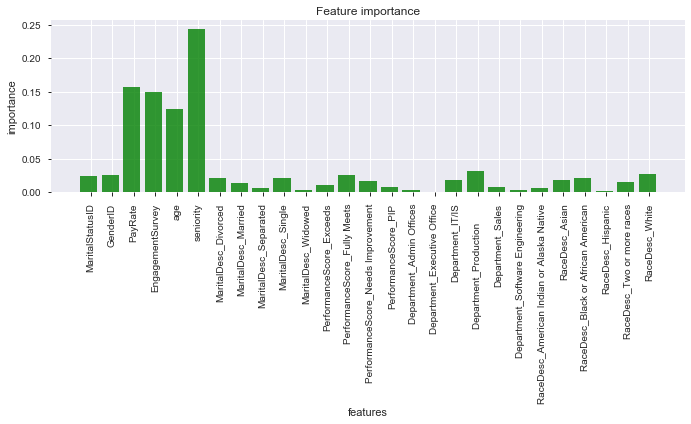

In [70]:
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(x_columns))

        
bar_width = 0.1
plt.bar(index, clf.feature_importances_, color='green', alpha=0.8)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, x_columns, rotation = 90)
plt.tight_layout()
plt.show()

In [67]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1] - 1) :
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.244069)
2. feature 2 (0.157003)
3. feature 3 (0.150004)
4. feature 4 (0.124448)
5. feature 18 (0.032067)
6. feature 26 (0.026469)
7. feature 1 (0.025185)
8. feature 12 (0.025054)
9. feature 0 (0.023586)
10. feature 6 (0.020726)
11. feature 9 (0.020650)
12. feature 23 (0.020505)
13. feature 22 (0.017903)
14. feature 17 (0.017551)
15. feature 13 (0.016799)
16. feature 25 (0.014975)
17. feature 7 (0.013545)
18. feature 11 (0.010273)
19. feature 14 (0.008240)
20. feature 19 (0.007583)
21. feature 21 (0.005708)
22. feature 8 (0.005629)
23. feature 20 (0.003786)
24. feature 10 (0.003682)
25. feature 15 (0.003195)
26. feature 24 (0.001172)


In [21]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler() 
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

scaled_logreg = LogisticRegression()
scaled_logreg.fit(X_train_transformed, y_train)
y_pred = scaled_logreg.predict(X_test_transformed)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))

[[26  2]
 [23 11]]
Accuracy: 0.5967741935483871
Precision score: [0.53061224 0.84615385]
Recall score: [0.92857143 0.32352941]
f1 score: [0.67532468 0.46808511]


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [23]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler() 
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)


scaled_rfc = RandomForestClassifier()
scaled_rfc.fit(X_train_transformed, y_train)
y_pred = scaled_rfc.predict(X_test_transformed)

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))

[[27  1]
 [22 12]]
Accuracy: 0.6290322580645161
Precision score: [0.55102041 0.92307692]
Recall score: [0.96428571 0.35294118]
f1 score: [0.7012987 0.5106383]


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [24]:
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train, y_train)
y_pred = neighbor.predict(X_test)
scores = cross_val_score(neighbor, X_train, y_train, cv=5)
print(scores)
meanCvAccuracy = scores.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy)

print("Precision score:", precision_score(y_test, y_pred,average=None))
print("Recall score:", recall_score(y_test, y_pred,average=None))
print("f1 score:", f1_score(y_test, y_pred,average=None))
print(confusion_matrix(y_test, y_pred))

[0.6        0.8        0.68       0.69387755 0.65306122]
Mean CV accuracy= 0.685388
Precision score: [0.51219512 0.66666667]
Recall score: [0.75       0.41176471]
f1 score: [0.60869565 0.50909091]
[[21  7]
 [20 14]]


### Finally, you should spend the day <font color=blue>refining </font> your machine learning models and your presentation. 
If you have time, you may also go back and perform additional data exploration and analysis.

* Continue <font color=blue>iterating</font> on your machine learning models with the objective of optimizing their performance.
* Organize your machine learning steps into a <font color=blue>pipeline</font> that performs feature selection/engineering, model training, model evaluation, and model storage.
* Further refine your presentation based on additional findings and results.

In [3]:
pd.read_csv('clean_HR.csv').DateofTermination

0             NaN
1             NaN
2             NaN
3      2015-04-15
4             NaN
          ...    
305           NaN
306           NaN
307           NaN
308           NaN
309           NaN
Name: DateofTermination, Length: 310, dtype: object